In [2]:
import silq
silq.initialize('Antimony', mode='analysis')
%matplotlib notebook

Initializing imports
Initializing functions
Initializing data
Initializing jupyter
Initialization complete


In [40]:
import qcodes as qc

In [112]:
def convert_setpoints(*args):        
    if not args:
        return tuple()
    else:
        first_arg = tuple(args[0])
        remaining_args = convert_setpoints(*args[1:])
        if remaining_args:
            print(f'remaining_args: {remaining_args}')
            remaining_args = tuple((arg,) * len(first_arg)
                                  for arg in remaining_args)
        return (first_arg, ) + remaining_args

In [117]:
class TestParameter(qc.MultiParameter):
    def __init__(self, name, shapes=(5,5), **kwargs):
        setpoints = convert_setpoints(np.linspace(0, 50, shapes[0]),
                                      np.linspace(0, 50, shapes[1]))
        print(setpoints)
        
        super().__init__(name=name, names=['DC_voltage'], shapes=(shapes,),
                         setpoint_names=(('setpoints_A', 'setpoints_B'),),
                         setpoints=(setpoints, ),
                         **kwargs)

        self.vals = np.random.randint(0, 10, size=shape)

    def setup(self):
        self.setpoints

    def get(self):
        return self.vals,


In [118]:
test_parameter = TestParameter('test')

remaining_args: ((0.0, 12.5, 25.0, 37.5, 50.0),)
((0.0, 12.5, 25.0, 37.5, 50.0), ((0.0, 12.5, 25.0, 37.5, 50.0), (0.0, 12.5, 25.0, 37.5, 50.0), (0.0, 12.5, 25.0, 37.5, 50.0), (0.0, 12.5, 25.0, 37.5, 50.0), (0.0, 12.5, 25.0, 37.5, 50.0)))


In [119]:
data = Measure(test_parameter).run(name='test')

DataSet:
   data = load_data('2017-05-29/#133_test_17-28-13')
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | setpoints_B_set | setpoints_B  | (5, 5)
   Measured | DC_voltage      | DC_voltage   | (5, 5)
acquired at 2017-05-29 17:28:13


In [122]:
data

DataSet:
   data = load_data('2017-05-29/#133_test_17-28-13')
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | setpoints_B_set | setpoints_B  | (5, 5)
   Measured | DC_voltage      | DC_voltage   | (5, 5)

<IPython.core.display.Javascript object>


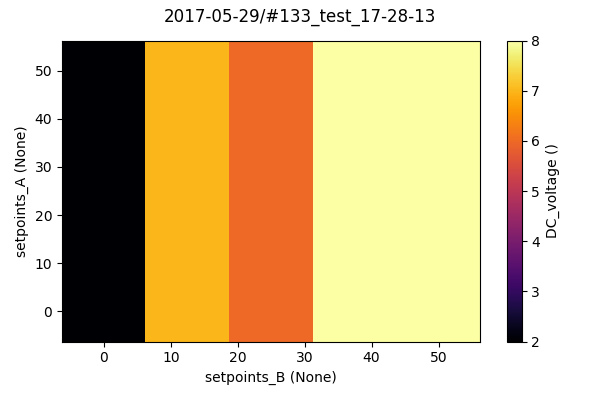

In [120]:
MatPlot(data.DC_voltage)